# Часть 1

1. Найти данные, распределение которых было бы близко к
    * нормальному (визуально выглядит как кривая Гаусса - «колокол»),
    * равномерному.

2. Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной.
3. Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),  дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загружаю два дата сета:
1. [Customer Churn](https://www.kaggle.com/datasets/barun2104/telecom-churn) - набор данных содержит информацию о клиентах телекоммуникационной компании.
2. [US Cost of Living Dataset](https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties) - набор данных содержит информацию о стоимости жизни в различных округах США на основе калькулятора семейного бюджета Института экономической политики (EPI).

In [3]:
data_1 = pd.read_csv('../data/telecom_churn.csv')
data_2 = pd.read_csv('../data/cost_of_living_us.csv')

Данные, распределение которых близко к нормальному:
  * среднее значение продолжительности разговора в месяц
  * среднее количество звонков

<Axes: xlabel='DayCalls', ylabel='Count'>

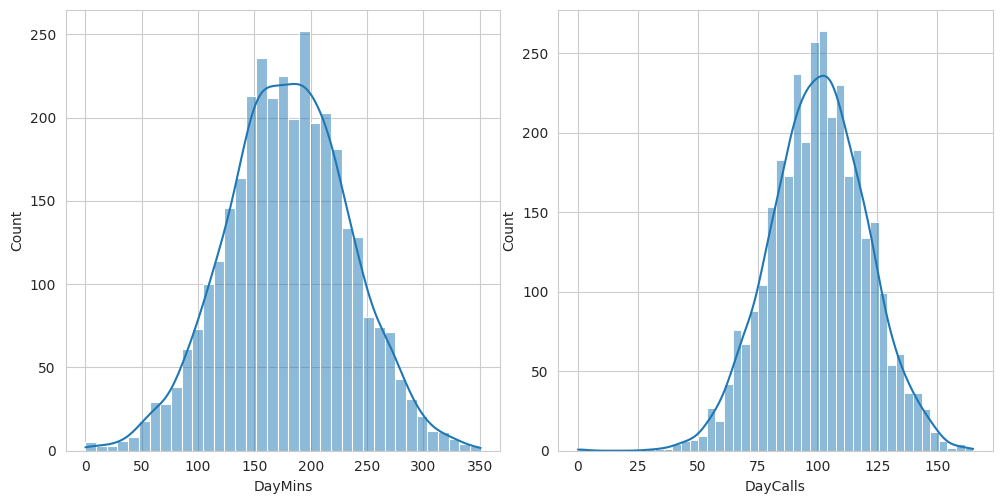

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.tight_layout()

sns.histplot(data_1['DayMins'], ax=axes[0], kde=True)
sns.histplot(data_1['DayCalls'], ax=axes[1], kde=True)

Данные, распределение которых близко к равномерному:
  * уникальный идентификатор для каждого округа

<Axes: xlabel='case_id', ylabel='Count'>

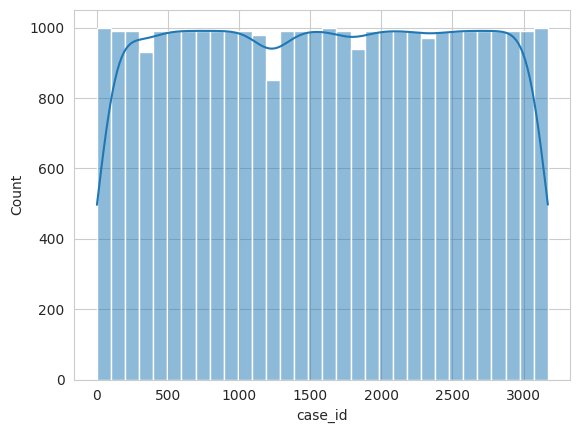

In [4]:
sns.histplot(data_2['case_id'], kde=True)

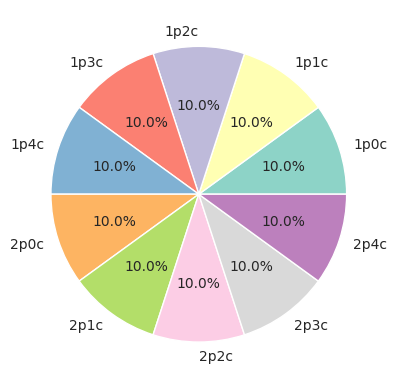

In [16]:
fig, ax = plt.subplots()
ax.pie(
    data_2['family_member_count'].value_counts(), 
    labels=data_2['family_member_count'].unique(), 
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors)
plt.show()

Распределение со смещённой медианой относительно среднего:
  * количество использованного трафика

In [6]:
mean = data_1['DataUsage'].mean()
median = data_1['DataUsage'].median()
scope = abs(data_1['DataUsage'].max() - data_1['DataUsage'].min())
percent_of_scope = scope * 0.01
deviation = abs(mean - median) / percent_of_scope 

print(f'Среднее: {mean:0.3f}\nМедиана: {median}\nРазмах: {scope}\nПроцент смещения медианы относительно среднего: {deviation:0.3f}')

Среднее: 0.816
Медиана: 0.0
Размах: 5.4
Процент смещения медианы относительно среднего: 15.120


<Axes: xlabel='DataUsage', ylabel='Count'>

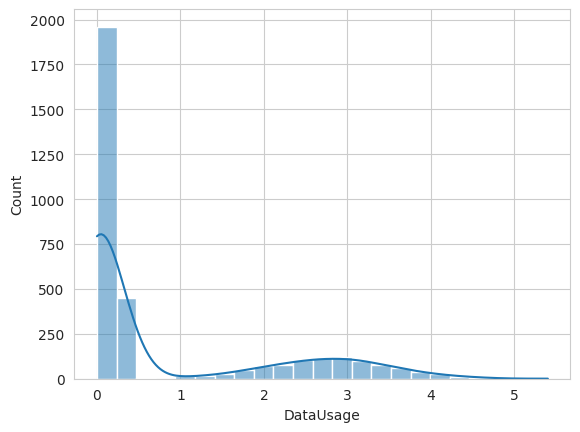

In [7]:
sns.histplot(data_1['DataUsage'], kde=True)

Примеры описательных характеристик и визуализации некоторыз данных

In [8]:
print(f'Среднее значение DayMins: {data_1["DayMins"].mean():0.3f}')
print(f'Медиана DayMins: {data_1["DayMins"].median():0.3f}')
print(f'Среднее значение DayCalls: {data_1["DayCalls"].mean():0.3f}')
print(f'Медиана DayCalls: {data_1["DayCalls"].median():0.3f}')

Среднее значение DayMins: 179.775
Медиана DayMins: 179.400
Среднее значение DayCalls: 100.436
Медиана DayCalls: 101.000


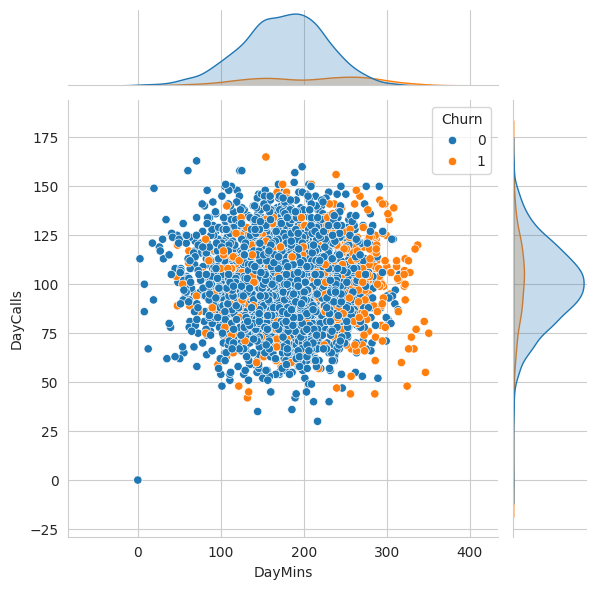

In [9]:
sns.jointplot(data_1, x='DayMins', y='DayCalls', hue='Churn')

# Часть 2

Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или корреляционный анализ и т.п.).

Воспользуемся вторым набором данных, содержащим сведения о стоимости жизни в различных округах США, и построим диаграмму размаха для показателя ориентировочной годовой стоимости продуктов питания для семьи и ориентировочных затрат на жильё.

<Axes: ylabel='food_cost'>

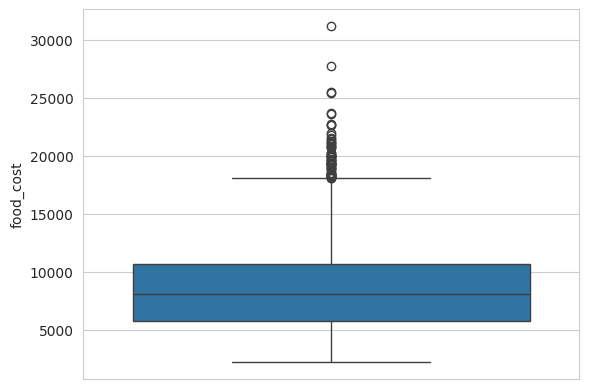

In [10]:
sns.boxplot(data_2['food_cost'])

<Axes: ylabel='housing_cost'>

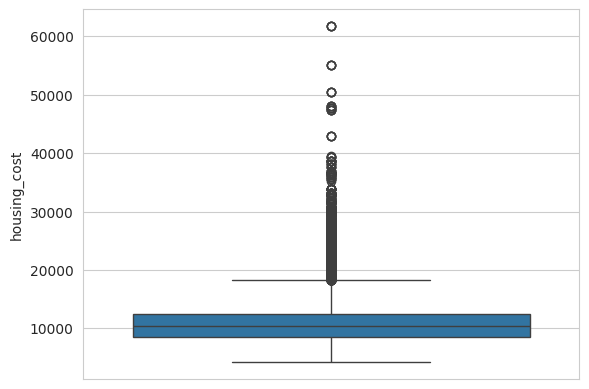

In [11]:
sns.boxplot(data_2['housing_cost'])

В датасете представлены данные для семей с разным количеством членов (взрослые от 1 до 2 и дети от 0 до 4). В зависимости от региона и размера семьи годовая стоимость продуктов питания будет варьироваться. Можно проверить существует ли корреляция между выбросами и размером семьи или округом проживания.
То же самое касается и расходов на жильё.

# Выводы

В ходе выполнения лабораторной работы я освежил свои навыки по работе с библиотеками для операций с датасетами
и визуализации данных. У меня возникли проблемы с поиском данных, распределение которых было бы близко к равномерному.
Много времени потратил на то, чтобы найти датасет, в котором один из существенных признаков имел бы равномерное распределение,
но ничего интересного не нашёл. В итоге остановился на данных о семейном бюджете в различных округах США.
Семьи в выборке практически равномерно распределены по округам и одновременно с этим распределение по количеству членов
семьи тоже равномерно. В связи с последним фактом задумался о том как это характеризует качество данных?
С одной стороны при решении задачи классификации часто возникает проблема дизбаланса классов, когда некоторый класс
в выборке представлен незначительно или наоборот, когда данных о каком-то конкретном классе слишком много, и на первый
взгляд при работе с конкретно этим датасетом такой проблемы возникнуть не должно. Однако с другой стороны на самом деле
в развитых странах семьи по количеству членов распределены отнюдь не равномерно: вероятность найти семью с четырьмя или даже с
тремя детьми гораздо меньше чем с одним ребёнком, поэтому у меня сложилось впечатление, что это отрицательно
скажется на точности модели, обученной на этих данных.